In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import seaborn as sns

In [2]:
def spectral_centroid(harmonics, amplitudes):
    h = np.array(harmonics)
    a = np.array(amplitudes)
    numerator = np.sum(h * a)
    denominator = np.sum(a)
    sc = numerator/denominator
    return sc

In [3]:
harmonics = list(range(1,2000,2))
amplitudes = [1/h for h in harmonics]

In [4]:
x = np.linspace(-np.pi, np.pi, 201)
sins = [a * np.sin(x * h) for a, h in zip(amplitudes, harmonics)]
square = np.sum(sins, axis=0)

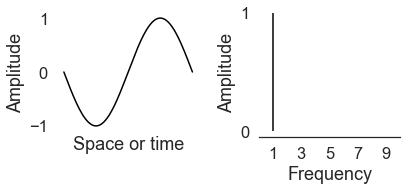

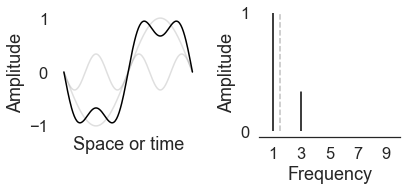

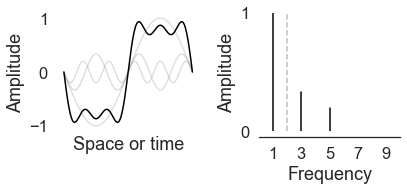

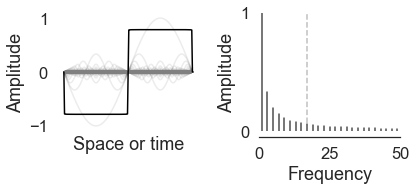

In [5]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style('white')

offset = 6
figsize = (6, 3)
x = np.linspace(-np.pi, np.pi, 201)


# Single sine wave

f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
ax1.plot(x, sins[0], color='black')
ax1.set_xlabel('Space or time')
ax1.set_ylabel('Amplitude')
ax1.set_yticks([-1, 0, 1])
ax1.set_xticks([])
ax1.axis('tight')
sns.despine(left=True, bottom=True, ax=ax1)

n_components = 1
sc = spectral_centroid(harmonics[:n_components], amplitudes[:n_components])
for a, h in zip(amplitudes[:n_components], harmonics[:n_components]):
    fx, fy = [h, h], [0, a]
    ax2.plot(fx, fy, color='black')
#ax2.plot([sc, sc], [0, 1], '--', c='gray', alpha=.5)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Amplitude')
ax2.set_xlim(0, 10)
ax2.set_xticks([1, 3, 5, 7, 9])
ax2.set_ylim(0, 1)
ax2.set_yticks([0, 1])
sns.despine(left=True, ax=ax2, offset=offset)
plt.tight_layout()
plt.savefig('intuition_1.svg')
plt.show()


# Two sine waves

f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

ax1.plot(x, sins[0], color='gray', alpha=.25)
ax1.plot(x, sins[1], color='gray', alpha=.25)
ax1.plot(x, sins[0] + sins[1], color='black')
ax1.set_xlabel('Space or time')
ax1.set_ylabel('Amplitude')
ax1.set_yticks([-1, 0, 1])
ax1.set_xticks([])
ax1.axis('tight')
sns.despine(left=True, bottom=True, ax=ax1)

n_components = 2
sc = spectral_centroid(harmonics[:n_components], amplitudes[:n_components])
for a, h in zip(amplitudes[:n_components], harmonics[:n_components]):
    fx, fy = [h, h], [0, a]
    ax2.plot(fx, fy, color='black')
ax2.plot([sc, sc], [0, 1], '--', c='gray', alpha=.5)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Amplitude')
ax2.set_xlim(0, 10)
ax2.set_xticks([1, 3, 5, 7, 9])
ax2.set_ylim(0, 1)
ax2.set_yticks([0, 1])
sns.despine(left=True, ax=ax2, offset=offset)
plt.tight_layout()
plt.savefig('intuition_2.svg')
plt.show()


# Three sine waves

f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

ax1.plot(x, sins[0], color='gray', alpha=.25)
ax1.plot(x, sins[1], color='gray', alpha=.25)
ax1.plot(x, sins[2], color='gray', alpha=.25)
ax1.plot(x, sins[0] + sins[1] + sins[2], color='black')
ax1.set_xlabel('Space or time')
ax1.set_ylabel('Amplitude')
ax1.set_yticks([-1, 0, 1])
ax1.set_xticks([])
ax1.axis('tight')
sns.despine(left=True, bottom=True, ax=ax1)

n_components = 3
sc = spectral_centroid(harmonics[:n_components], amplitudes[:n_components])
for a, h in zip(amplitudes[:n_components], harmonics[:n_components]):
    fx, fy = [h, h], [0, a]
    ax2.plot(fx, fy, color='black')
ax2.plot([sc, sc], [0, 1], '--', c='gray', alpha=.5)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Amplitude')
ax2.set_xlim(0, 10)
ax2.set_xticks([1, 3, 5, 7, 9])
ax2.set_ylim(0, 1)
ax2.set_yticks([0, 1])
sns.despine(left=True, ax=ax2, offset=offset)
plt.tight_layout()
plt.savefig('intuition_3.svg')
plt.show()


# Full series

f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

for sin in sins:
    ax1.plot(x, sin, color='gray', alpha=.15)
ax1.plot(x, square, color='black')
ax1.set_xlabel('Space or time')
ax1.set_ylabel('Amplitude')
ax1.set_yticks([-1, 0, 1])
ax1.set_xticks([])
ax1.axis('tight')
sns.despine(left=True, bottom=True, ax=ax1)

n_components = 50
sc = spectral_centroid(harmonics[:n_components], amplitudes[:n_components])
for a, h in zip(amplitudes[:n_components], harmonics[:n_components]):
    fx, fy = [h, h], [0, a]
    ax2.plot(fx, fy, color='black', alpha=.7)
ax2.plot([sc, sc], [0, 1], '--', c='gray', alpha=.5)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Amplitude')
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 1)
ax2.set_yticks([0, 1])
sns.despine(left=True, ax=ax2, offset=offset)
plt.tight_layout()
plt.savefig('intuition_4.svg')
plt.show()

1. A smooth sinusoidal curve (left) has a frequency spectrum (right) containing one component, which is also its spectral centroid.

2. As higher frequency components are added (left, in gray), their sum (left, in black) becomes bumpier, and moves the spectral centroid (right, dotted line) higher...

3. ...and higher...

4. Corners require many more components at higher frequencies, which push up the spectral centroid.